<a href="https://colab.research.google.com/github/allirezamaleki/BachelorProject/blob/main/cancer(catboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [ ]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
images_path = {}
images_path["benign"] = glob("/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/*/*/40X/*.png")
images_path["malignant"] = glob("/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/malignant/SOB/*/*/40X/*.png")
images_class = {
    'benign' : 0,
    'malignant' : 1
}

print(images_path)

{'benign': ['/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-004.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-001.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-005.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-002.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-006.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-21978AB/40X/SOB_B_TA-14-21978AB-40-003.png', '/content/drive/MyDrive/Datasets2/BreaKHis_v1/histology_slides/b

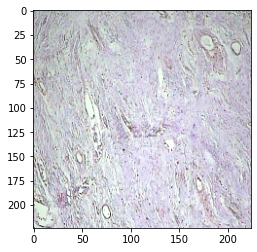

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

In [ ]:
x = np.array(X)
y = np.array(Y)

pre_trained_models = {}

**MODEL**

In [ ]:
from keras.applications.vgg19 import VGG19
pre_trained_models["VGG19"] = VGG19(include_top=False, input_shape=(224, 224, 3), pooling="avg")

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_models["VGG19"].layers:
    layer.trainable = False

split test and train set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train = pre_trained_models["VGG19"].predict(X_train)
X_test = pre_trained_models["VGG19"].predict(X_test)

In [ ]:
#Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

**CLASSIFIER**

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier
Classifier = CatBoostClassifier(depth = 7, iterations = 150, learning_rate = 0.05, random_state = 0)
Classifier.fit(X_train, Y_train)

0:	learn: 0.6663092	total: 512ms	remaining: 1m 16s
1:	learn: 0.6408484	total: 774ms	remaining: 57.3s
2:	learn: 0.6152130	total: 1.01s	remaining: 49.8s
3:	learn: 0.5926306	total: 1.24s	remaining: 45.3s
4:	learn: 0.5744877	total: 1.48s	remaining: 43s
5:	learn: 0.5540455	total: 1.71s	remaining: 41s
6:	learn: 0.5382850	total: 1.94s	remaining: 39.5s
7:	learn: 0.5207577	total: 2.16s	remaining: 38.4s
8:	learn: 0.5075117	total: 2.39s	remaining: 37.4s
9:	learn: 0.4933107	total: 2.63s	remaining: 36.8s
10:	learn: 0.4770081	total: 2.85s	remaining: 36s
11:	learn: 0.4608048	total: 3.08s	remaining: 35.5s
12:	learn: 0.4469026	total: 3.31s	remaining: 34.9s
13:	learn: 0.4345088	total: 3.55s	remaining: 34.5s
14:	learn: 0.4226048	total: 3.78s	remaining: 34s
15:	learn: 0.4140310	total: 4s	remaining: 33.5s
16:	learn: 0.4062023	total: 4.22s	remaining: 33.1s
17:	learn: 0.3967616	total: 4.46s	remaining: 32.7s
18:	learn: 0.3882252	total: 4.69s	remaining: 32.4s
19:	learn: 0.3781723	total: 4.92s	remaining: 32s
20

In [ ]:
Y_pred = Classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.8781302170283807


*Find* The Best Parameter in Classifier

In [ ]:
parameters = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.8, 0.9, 0.99],
    'iterations': range(100, 200, 10),
    'depth': range(0,10)
}
grid_search = GridSearchCV(estimator = Classifier, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_search.fit(X_train, Y_train)

In [ ]:
best_acc = grid_search.best_score_
print(best_acc)

In [ ]:
best_param = grid_search.best_params_
print(best_param)

In [ ]:
#Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
# lgb.save(Classifier, "/content/drive/MyDrive/Ai_project/LightGBM1.model/")

In [ ]:
# DensNet 201
# 0.9298831385642737 with gpu
# 0.9332220367278798 without gpu

# DenseNet 169
# 0.9232053422370617 without gpu
# 0.9065108514190318 with gpu

# import warnings
# warnings.filterwarnings("ignore")

**Metrics**

In [ ]:
# print("Accuracy score : ", accuracy_score(Y_test, Y_pred))
# print("mean_squared_error : ", mean_squared_error(Y_test, Y_pred))
# print("r2_score : ", r2_score(Y_test, Y_pred))
# print("f1_score : ", f1_score(Y_test, Y_pred))
# print("precision_score: ", precision_score(Y_test, Y_pred))
# print("recall_score : ", recall_score(Y_test, Y_pred))

**CONFUSION MATRIX**

In [ ]:
# import seaborn as sns
# cm = confusion_matrix(Y_test, Y_pred)
# Cmatrix = sns.heatmap(cm, annot=True)

# figure = Cmatrix.get_figure()    
# figure.savefig('./drive/MyDrive/Datasets/EfficientNetB7_CM.png', dpi=400)

In [ ]:
# !tar -xzvf "/content/drive/MyDrive/BreaKHis_v1.tar.gz" -C "/content/drive/MyDrive/Datasets2/"

In [ ]:
# from lightgbm import LGBMClassifier
# Classifier = LGBMClassifier(learning_rate = 0.5, max_bin = 100, num_iterations = 200, random_state = 0)
# Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(learning_rate=0.5, max_bin=100, num_iterations=200,
               random_state=0)